In [1]:
!pip install yfinance
!pip install PyPortfolioOpt
import yfinance as yf

     |████████████████████████████████| 60 kB 734 kB/s eta 0:00:01
     |████████████████████████████████| 114 kB 1.3 MB/s eta 0:00:01
  Using cached multitasking-0.0.11-py3-none-any.whl (8.5 kB)
  Using cached appdirs-1.4.4-py2.py3-none-any.whl (9.6 kB)
  Using cached html5lib-1.1-py2.py3-none-any.whl (112 kB)
     |████████████████████████████████| 7.1 MB 784 kB/s eta 0:00:01
     |████████████████████████████████| 61 kB 75 kB/s  eta 0:00:01
     |████████████████████████████████| 4.0 MB 380 kB/s eta 0:00:01
     |████████████████████████████████| 1.1 MB 41 kB/s eta 0:00:017
     |████████████████████████████████| 220 kB 101 kB/s eta 0:00:01
     |████████████████████████████████| 10.7 MB 765 kB/s eta 0:00:01
     |████████████████████████████████| 298 kB 783 kB/s eta 0:00:01
     |████████████████████████████████| 1.0 MB 39 kB/s eta 0:00:012    |▋                               | 20 kB 349 kB/s eta 0:00:03
  Attempting uninstall: setuptools
    Found existing installation: setuptools

/home/tathagat/miniconda3/lib/python3.9/site-packages/requests/__init__.py:102: RequestsDependencyWarning: urllib3 (1.26.8) or chardet (5.1.0)/charset_normalizer (2.0.4) doesn't match a supported version!
  warnings.warn("urllib3 ({}) or chardet ({})/charset_normalizer ({}) doesn't match a supported "


In [2]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np, pandas as pd
import matplotlib.pyplot as plt, seaborn as sns
from datetime import datetime

plt.rcParams["figure.figsize"] = (15, 7.5)

In [3]:
end = datetime.now()
start = datetime(end.year -5 , end.month, end.day)

stocks = ['AAPL','MSFT','GOOG','AMZN']

df = pd.DataFrame()
for stock in stocks:
  globals()[stock] = yf.download(stock,start,end)
  globals()[stock]['Ticker'] = stock
  df = df.append(globals()[stock])

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [27]:
df

,Open,High,Low,Close,Adj Close,Volume,Ticker,Daily Return
Date,,,,,,,,
2018-04-23,41.707500,41.730000,41.022499,41.310001,39.381702,146062000,AAPL,NaN
2018-04-24,41.417500,41.582500,40.305000,40.735001,38.833538,134768000,AAPL,-0.013919
2018-04-25,40.654999,41.355000,40.602501,40.912498,39.002750,113528400,AAPL,0.004357
2018-04-26,41.029999,41.432499,40.842499,41.055000,39.138592,111852000,AAPL,0.003483
2018-04-27,41.000000,41.082500,40.157501,40.580002,38.685772,142623200,AAPL,-0.011570
...,...,...,...,...,...,...,...,...
2023-04-17,103.160004,103.730003,101.589996,102.739998,102.739998,39919500,AMZN,0.002244
2023-04-18,103.949997,104.199997,101.519997,102.300003,102.300003,39790500,AMZN,-0.004283
2023-04-19,101.580002,105.120003,101.389999,104.300003,104.300003,58398900,AMZN,0.019550


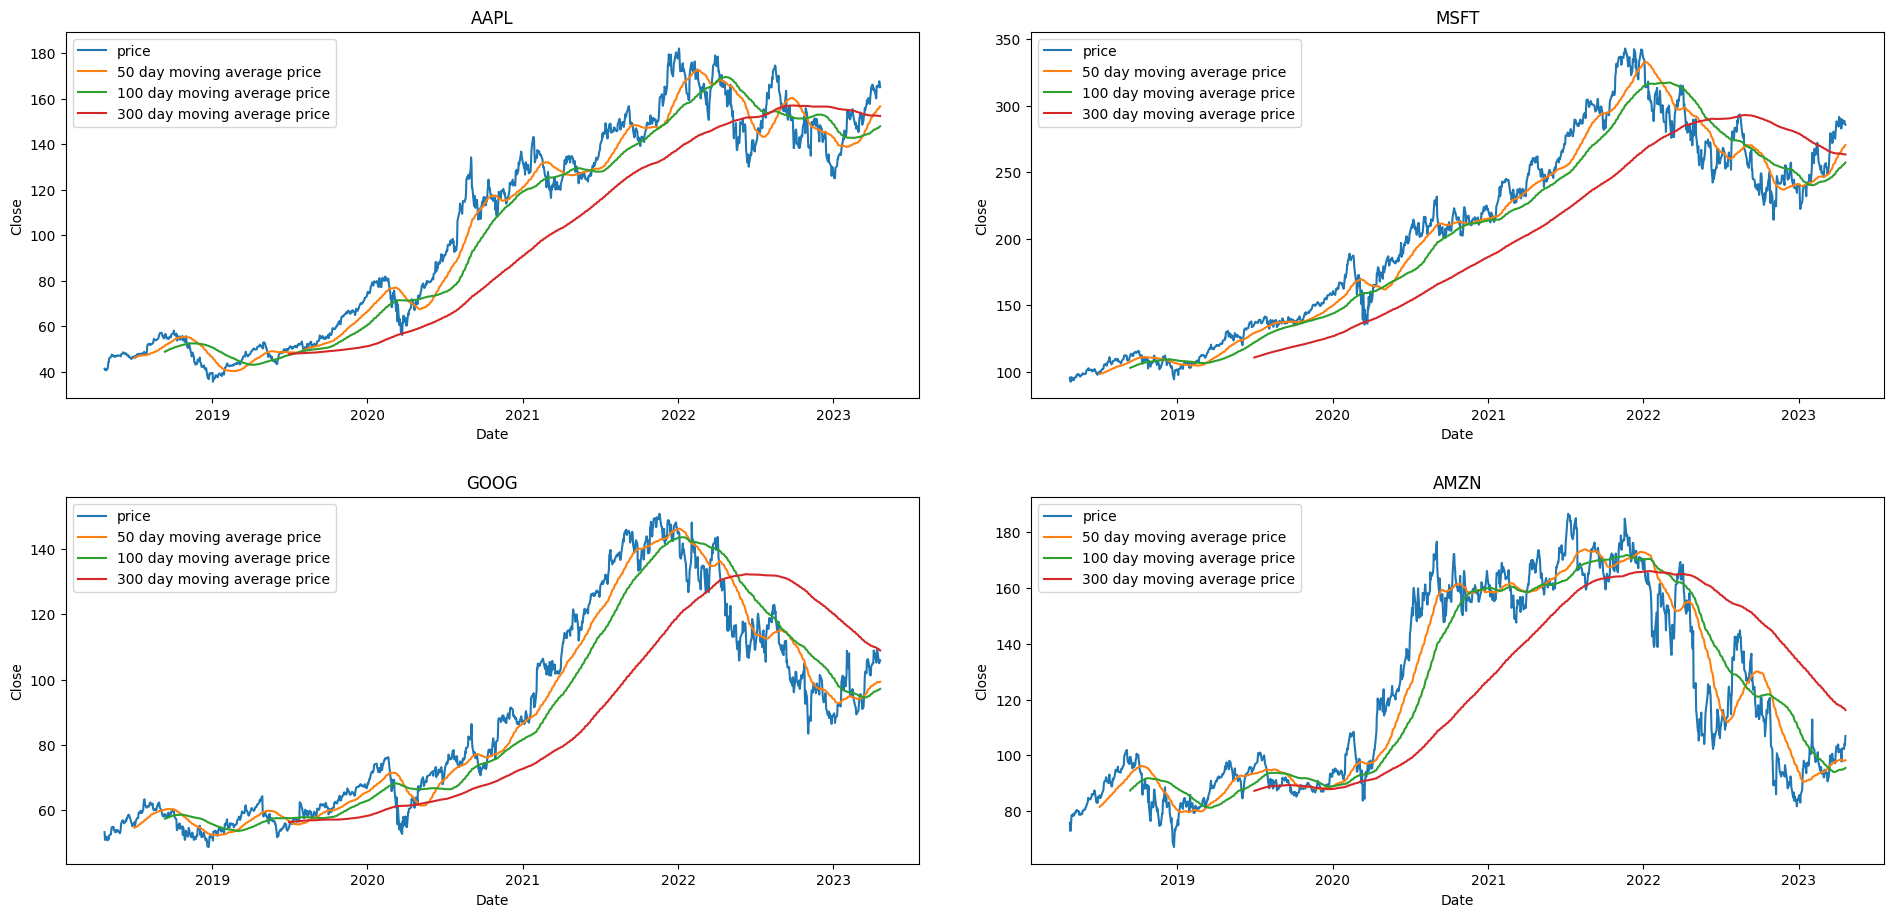

In [28]:
fig, axes = plt.subplots(2,2,figsize=(20,10))
fig.tight_layout(pad=5)

for (i, ax), stock in zip(enumerate(axes.ravel()),stocks):
  sns.lineplot(x=df.loc[df['Ticker']==stock,'Close'].index,y=df.loc[df['Ticker']==stock,'Close'],ax=ax, label='price').set(title=stock)
  sns.lineplot(x=df.loc[df['Ticker']==stock,'Close'].index,y=df.loc[df['Ticker']==stock,'Close'].rolling(50).mean(),ax=ax, label='50 day moving average price')
  sns.lineplot(x=df.loc[df['Ticker']==stock,'Close'].index,y=df.loc[df['Ticker']==stock,'Close'].rolling(100).mean(),ax=ax, label='100 day moving average price')
  sns.lineplot(x=df.loc[df['Ticker']==stock,'Close'].index,y=df.loc[df['Ticker']==stock,'Close'].rolling(300).mean(),ax=ax, label='300 day moving average price')

In [6]:
for stock in stocks:
  df.loc[df['Ticker']==stock,'Daily Return'] =  df.loc[df['Ticker']==stock,'Adj Close'].pct_change()

### Daily Returns 

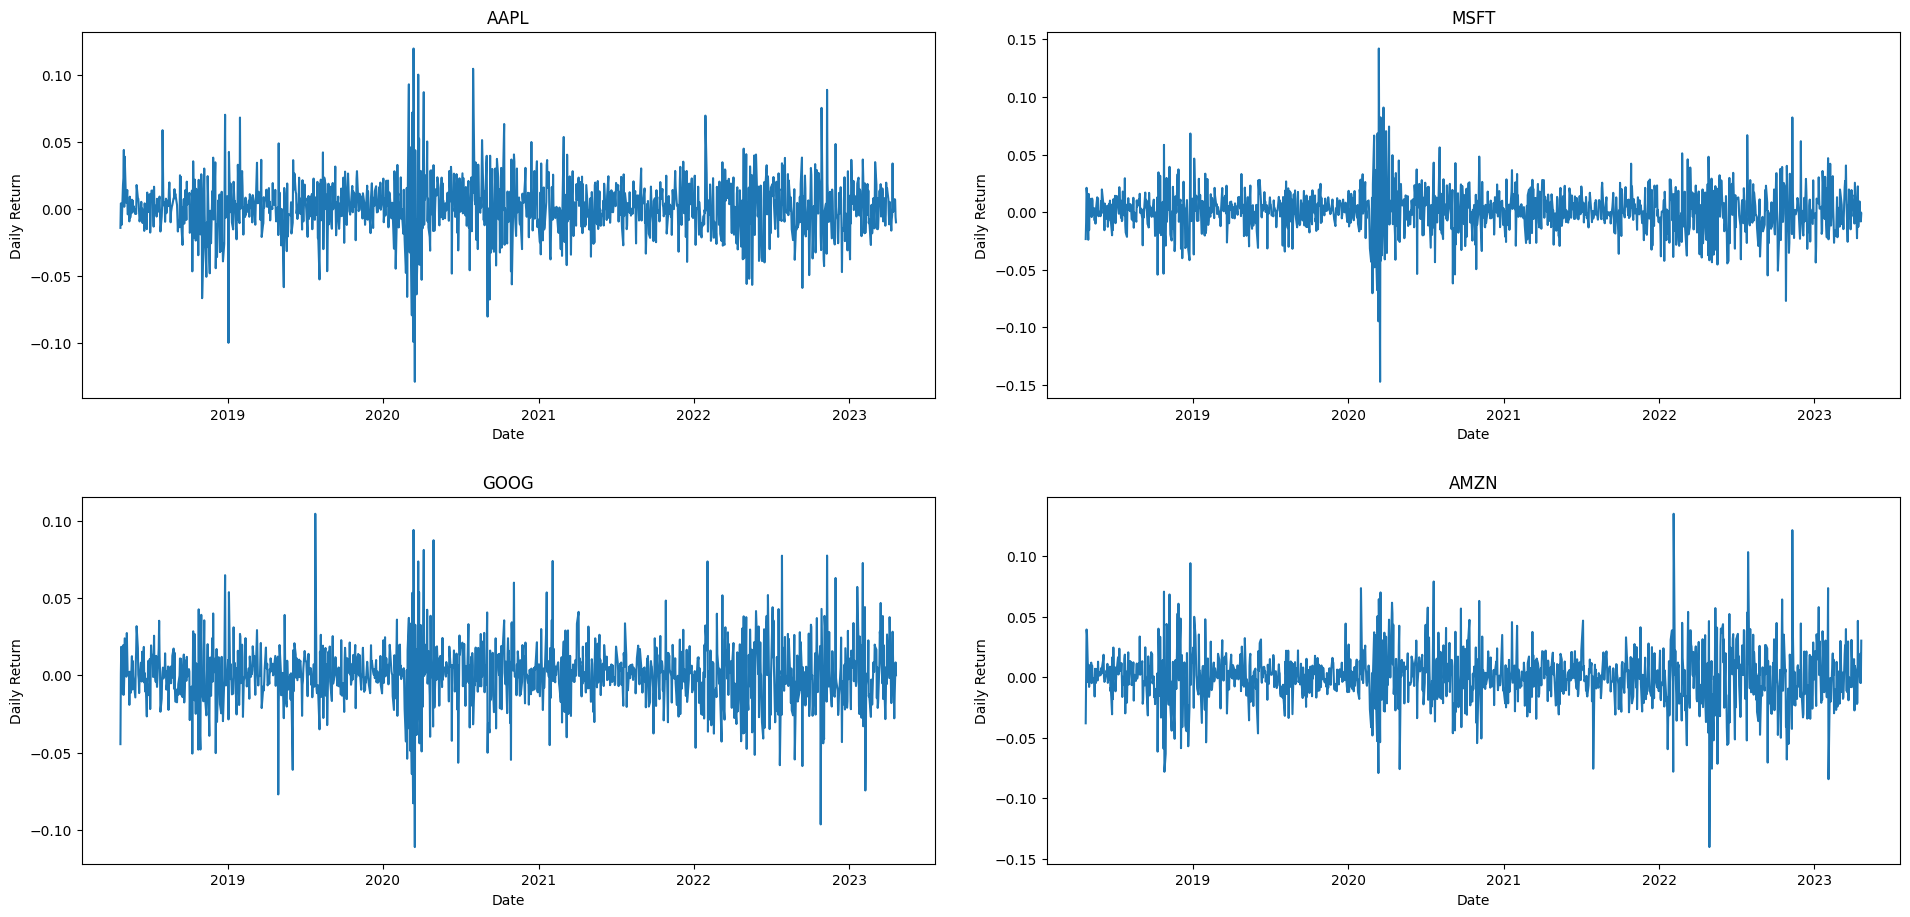

In [7]:
fig, axes = plt.subplots(2,2,figsize=(20,10))
fig.tight_layout(pad=5)

for (i, ax), stock in zip(enumerate(axes.ravel()),stocks):
  sns.lineplot(data=df[df['Ticker']==stock],x=df[df['Ticker']==stock].index,y='Daily Return',ax=ax).set(title=stock)

In [8]:
daily_return_df = df.reset_index().pivot(index='Date',columns='Ticker',values='Daily Return').dropna()
closing_price_df = df.reset_index().pivot(index='Date',columns='Ticker',values='Adj Close').dropna()
daily_return_df.head()

Ticker,AAPL,AMZN,GOOG,MSFT
Date,,,,
2018-04-24,-0.013919,-0.038060,-0.044470,-0.023387
2018-04-25,0.004357,0.000055,0.001176,-0.008699
2018-04-26,0.003483,0.039578,0.018469,0.021124
2018-04-27,-0.011570,0.036009,-0.009605,0.016550
2018-04-30,0.018112,-0.004127,-0.012349,-0.024003


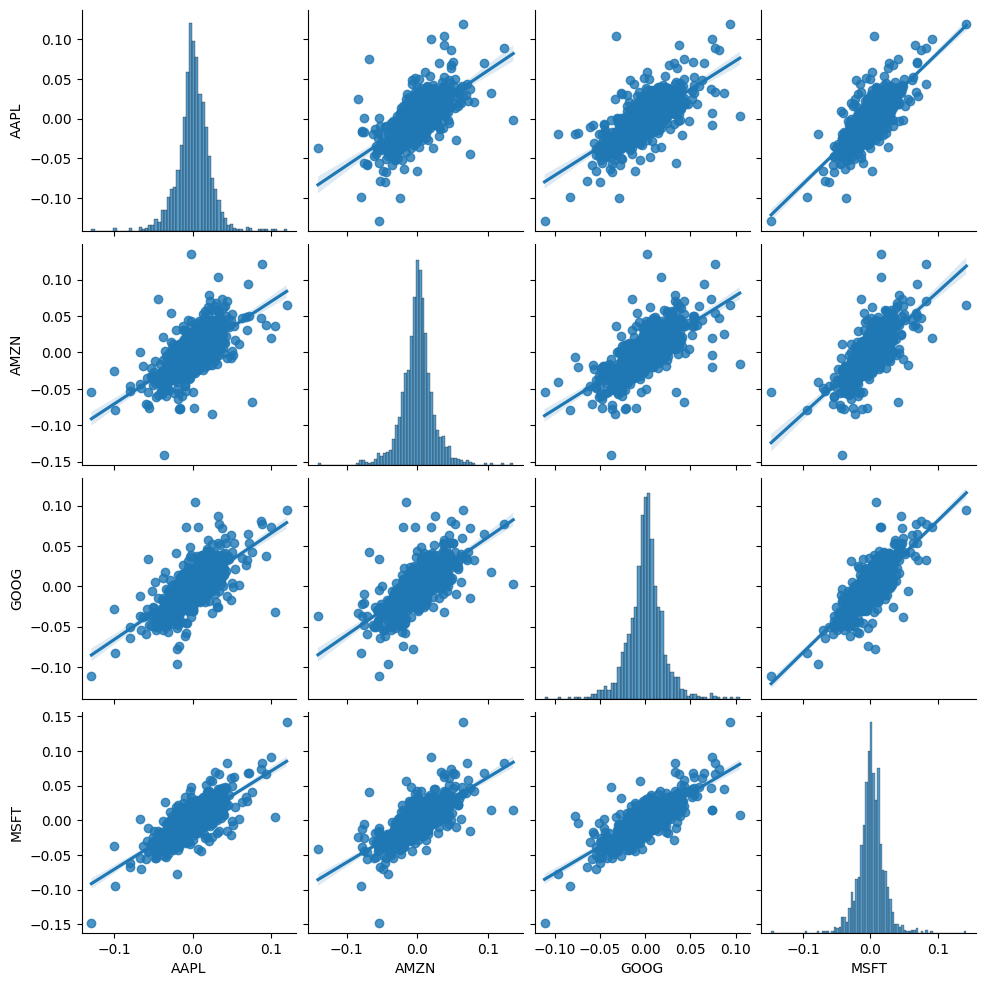

In [9]:
sns.pairplot(daily_return_df,kind='reg')

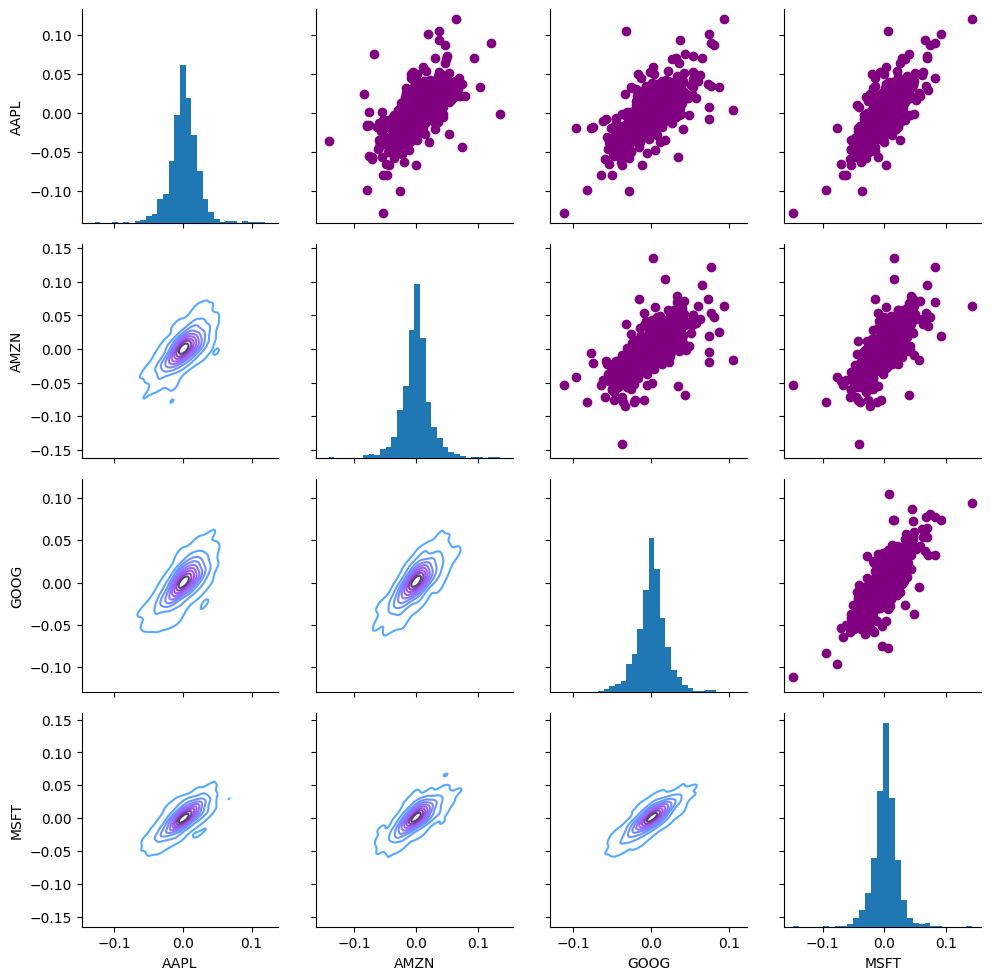

In [10]:
fig = sns.PairGrid(daily_return_df.dropna())

fig.map_upper(plt.scatter,color='purple')

fig.map_lower(sns.kdeplot, cmap='cool_d')

fig.map_diag(plt.hist, bins=30)

[Text(0.5, 1.0, 'Closing Price Correlation')]

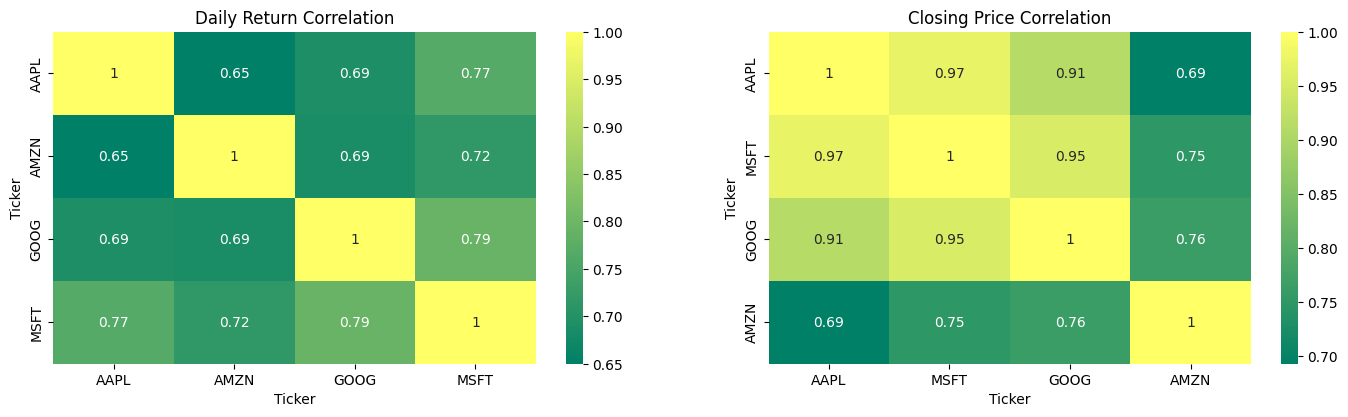

In [11]:
fig, axes = plt.subplots(1,2,figsize=(15,5))
fig.tight_layout(pad=5)

sns.heatmap(daily_return_df.corr(),annot=True,cmap='summer',ax=axes[0]).set(title='Daily Return Correlation')
sns.heatmap(closing_price_df[stocks].corr(),annot=True,cmap='summer',ax=axes[1]).set(title='Closing Price Correlation')

**Modern Portfolio Theory**

Modern Portfolio Theory (MPT) is an investment theory developed by Harry Markowitz in 1952 that describes how investors can construct portfolios that maximize expected return for a given level of risk. MPT assumes that investors are rational and risk-averse, meaning they will only take on additional risk if they expect to be compensated with higher returns.

MPT is based on the idea that an investor's portfolio should be diversified across multiple assets to reduce the overall risk of the portfolio. According to MPT, the risk of an individual asset should not be considered in isolation, but rather in the context of the entire portfolio. MPT defines risk as the volatility of returns and assumes that investors are only concerned with the variability of their returns and not their absolute level.

The goal is to find the portfolio with the highest expected return for a given level of risk, or the lowest risk for a given level of expected return. The optimal portfolio is found by plotting the risk-return tradeoff, known as the efficient frontier, and selecting the portfolio with the highest return for a given level of risk or the lowest risk for a given level of return.


In [44]:
d = yf.download(stocks,start,end)
daily_return_df = d['Adj Close'].pct_change().dropna()
individual_rets = d['Adj Close'].resample('Y').last().pct_change().mean()

returns = []
volatility = []
portfolio_weights = []

variance_matrix = daily_return_df.cov()*252
variance_matrix

num_assets = len(daily_return_df.columns)
num_portfolios = 10000

for port in range(num_portfolios):
  weights = np.random.random(num_assets)
  weights = weights/np.sum(weights)
  portfolio_weights.append(weights)

  returns.append(np.dot(weights, individual_rets))
  var = variance_matrix.mul(weights, axis=0).mul(weights, axis=1).sum().sum()
  sd = np.sqrt(var)

  ann_sd = sd*np.sqrt(250)
  volatility.append(ann_sd)

[*********************100%***********************]  4 of 4 completed


In [54]:
daily_return_df.cov()*252

,AAPL,AMZN,GOOG,MSFT
AAPL,0.111112,0.078219,0.073257,0.078821
AMZN,0.078219,0.130418,0.079007,0.079955
GOOG,0.073257,0.079007,0.101213,0.077906
MSFT,0.078821,0.079955,0.077906,0.095491


In [45]:
data = {'Returns': returns, 'Volatility':volatility}

for counter, symbol in enumerate(closing_price_df.columns.tolist()):
  data[symbol] = [w[counter] for w in portfolio_weights]

In [48]:
portfolios_V1 = pd.DataFrame(data)

rf = 0.01
min_volatility_port = portfolios_V1.iloc[portfolios_V1['Volatility'].idxmin()]
optimal_risky_port = portfolios_V1.iloc[((portfolios_V1['Returns']-rf)/portfolios_V1['Volatility']).idxmax()]  #optimal risk portfolio

,Returns,Volatility,AAPL,AMZN,GOOG,MSFT
0,0.318133,4.643256,0.425825,0.038433,0.240832,0.294910
1,0.294666,4.625427,0.305395,0.156288,0.150456,0.387860
2,0.258234,4.619175,0.167537,0.225882,0.283955,0.322625
3,0.261778,4.607563,0.194085,0.165741,0.383400,0.256775
4,0.305607,4.716125,0.470734,0.240326,0.136437,0.152504


In [58]:
min_volatility_port.to_frame().T

,Returns,Volatility,AAPL weight,AMZN weight,GOOG weight,MSFT weight
6520,0.27854,4.594024,0.226011,0.102595,0.322918,0.348476


In [12]:
returns = []
volatility = []
portfolio_weights = []

variance_matrix = daily_return_df.cov()*252
variance_matrix

num_assets = len(daily_return_df.columns)
num_portfolios = 10000

individual_rets = closing_price_df.resample('Y').last().pct_change().mean()

for port in range(num_portfolios):
  weights = np.random.random(num_assets)
  weights = weights/np.sum(weights)
  portfolio_weights.append(weights)

  returns.append(np.dot(weights, individual_rets))
  var = variance_matrix.mul(weights, axis=0).mul(weights, axis=1).sum().sum()
  sd = np.sqrt(var)

  ann_sd = sd*np.sqrt(250)
  volatility.append(ann_sd)

In [49]:
data = {'Returns': returns, 'Volatility':volatility}

for counter, symbol in enumerate(closing_price_df.columns.tolist()):
  data[symbol+' weight'] = [w[counter] for w in portfolio_weights]

In [51]:
optimal_risky_port

Returns        0.396386
Volatility     5.135934
AAPL weight    0.908919
AMZN weight    0.039734
GOOG weight    0.006237
MSFT weight    0.045110
Name: 2092, dtype: float64

In [14]:
portfolios_V1 = pd.DataFrame(data)
portfolios_V1.head()

,Returns,Volatility,AAPL weight,AMZN weight,GOOG weight,MSFT weight
0,0.272860,4.652377,0.305937,0.268721,0.247064,0.178278
1,0.343967,4.736634,0.515063,0.032567,0.058165,0.394205
2,0.271503,4.687467,0.330185,0.310815,0.233355,0.125645
3,0.250870,4.667233,0.027382,0.029256,0.483902,0.459461
4,0.229446,4.751200,0.150320,0.412027,0.317783,0.119870


In [15]:
min_volatility_port = portfolios_V1.iloc[portfolios_V1['Volatility'].idxmin()] #minimum volatility portfolio
min_volatility_port

Returns        0.280120
Volatility     4.594059
AAPL weight    0.230957
AMZN weight    0.096474
GOOG weight    0.320701
MSFT weight    0.351868
Name: 6031, dtype: float64

In [16]:
rf = 0.01 #maximum risk to be taken
optimal_risky_port = portfolios_V1.iloc[((portfolios_V1['Returns']-rf)/portfolios_V1['Volatility']).idxmax()]  #optimal risk portfolio
optimal_risky_port

Returns        0.381809
Volatility     4.964751
AAPL weight    0.779539
AMZN weight    0.005589
GOOG weight    0.042587
MSFT weight    0.172285
Name: 8645, dtype: float64

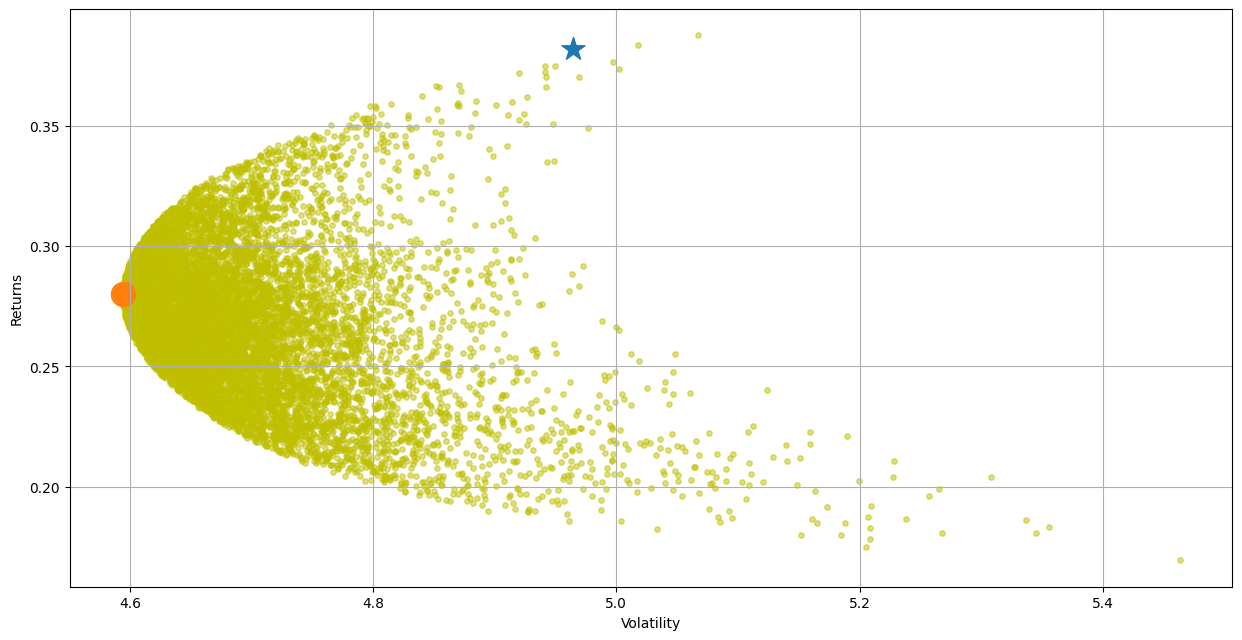

In [17]:
portfolios_V1.plot.scatter(x='Volatility',y='Returns',marker='o',color='y',s=15, alpha=0.5, grid=True)
plt.scatter(optimal_risky_port[1],optimal_risky_port[0],marker='*',s=300)
plt.scatter(min_volatility_port[1],min_volatility_port[0],marker='o',s=300)

**Mean Variance Optimization**

Mean Variance Optimization is a portfolio optimization technique that seeks to find the portfolio with the highest expected return for a given level of risk, or the lowest risk for a given level of expected return. MVO considers the expected returns of individual assets and their covariance matrix, and uses these inputs to mathematically optimize the portfolio.



In [59]:
from pypfopt.expected_returns import mean_historical_return
from pypfopt.risk_models import CovarianceShrinkage

mu = mean_historical_return(closing_price_df[stocks])
S = CovarianceShrinkage(closing_price_df[stocks]).ledoit_wolf()

In [60]:
from pypfopt.efficient_frontier import EfficientFrontier

ef = EfficientFrontier(mu, S)
weights = ef.max_sharpe()

cleaned_weights = ef.clean_weights()
print(dict(cleaned_weights))

{'AAPL': 0.82702, 'MSFT': 0.17298, 'GOOG': 0.0, 'AMZN': 0.0}


In [73]:
ef.portfolio_performance(verbose=True)

Expected annual return: 32.0%
Annual volatility: 31.8%
Sharpe Ratio: 0.94


(0.3199819348782388, 0.31796460688453454, 0.9434444223761483)

In [21]:
from pypfopt.discrete_allocation import DiscreteAllocation, get_latest_prices

latest_prices = get_latest_prices(closing_price_df[stocks])

da = DiscreteAllocation(weights, latest_prices, total_portfolio_value=100000)

allocation, leftover = da.greedy_portfolio()
print("Discrete allocation:", allocation)
print("Funds remaining: ${:.2f}".format(leftover))

Discrete allocation: {'AAPL': 501, 'MSFT': 60}
Funds remaining: $179.38


**Hierarchical Risk Parity (HRP)**

Hierarchical Risk Parity is a portfolio optimization technique that takes into account the hierarchical structure of the market to build a diversified portfolio. The idea behind HRP is to cluster assets based on their similarity, and then allocate risk equally within each cluster, and then allocate capital to the clusters based on their total risk contribution to the portfolio.

In [74]:
from pypfopt import HRPOpt

hrp = HRPOpt(daily_return_df)
hrp_weights = hrp.optimize()

hrp.portfolio_performance(verbose=True)
print(dict(hrp_weights))

Expected annual return: 24.0%
Annual volatility: 29.2%
Sharpe Ratio: 0.75
{'AAPL': 0.2543795901796108, 'AMZN': 0.21672441691304808, 'GOOG': 0.2567546583261047, 'MSFT': 0.2721413345812364}


In [23]:
da_hrp = DiscreteAllocation(hrp_weights, latest_prices, total_portfolio_value=100000)

allocation, leftover = da_hrp.greedy_portfolio()
print("Discrete allocation (HRP):", allocation)
print("Funds remaining (HRP): ${:.2f}".format(leftover))

Discrete allocation (HRP): {'MSFT': 95, 'GOOG': 242, 'AAPL': 154, 'AMZN': 203}
Funds remaining (HRP): $96.62


**Mean Conditional Value at Risk (mCVAR)**

Mean Conditional Value at Risk is a portfolio optimization technique that considers the worst-case scenario when constructing a portfolio. CVaR seeks to minimize the expected loss of the portfolio beyond a certain level of risk. It takes into account the tail risk, which is the risk of extreme events that are unlikely to occur, but can have a significant impact on the portfolio.

In [97]:
import plotly.graph_objs as go
data = yf.download(['AAPL','IBM','AMZN'],start=start,end=end)
data
traces = []
for ticker in data['Close'].columns:
#     data = yf.download(ticker,start=start,end=end)
    trace = go.Scatter(x=data.index, y=data[('Close',ticker)], mode='lines',name=ticker)
    traces.append(trace)

fig = go.Figure(data=traces)
# st.plotly_chart(fig)
# data['Close'].values.T

[*********************100%***********************]  3 of 3 completed


In [24]:
from pypfopt.efficient_frontier import EfficientCVaR

S = closing_price_df[stocks].cov()
ef_cvar = EfficientCVaR(mu, S)
cvar_weights = ef_cvar.min_cvar()

cleaned_weights = ef_cvar.clean_weights()
print(dict(cleaned_weights))

{'AAPL': 0.0, 'MSFT': 1.0, 'GOOG': 0.0, 'AMZN': 0.0}


In [25]:
da_cvar = DiscreteAllocation(cvar_weights, latest_prices, total_portfolio_value=100000)

allocation, leftover = da_cvar.greedy_portfolio()
print("Discrete allocation (CVAR):", allocation)
print("Funds remaining (CVAR): ${:.2f}".format(leftover))

Discrete allocation (CVAR): {'MSFT': 349, 'GOOG': 1}
Funds remaining (CVAR): $163.85


**Black-Litterman Model**

The Black-Litterman model is a portfolio optimization technique that combines the views of the investor with the market equilibrium to construct a portfolio. The model takes the market equilibrium as a starting point, and then adjusts the weights of the assets based on the investor's views. It takes into account the uncertainty of the views and uses a Bayesian approach to update the weights of the assets. The model also adjusts the weights of the assets to reflect the investor's risk tolerance.

In [98]:
from pypfopt import expected_returns, risk_models
from pypfopt.black_litterman import BlackLittermanModel

n_assets = 4
mu = expected_returns.mean_historical_return(closing_price_df[stocks])
S = risk_models.sample_cov(closing_price_df[stocks])

# Specify your views and confidence levels
viewdict = {
    'AAPL': 0.05,
    'MSFT': 0.04,
    'AMZN': 0.03,
    'GOOG': 0.02
}
confidences = {
    'AAPL': 0.6,
    'MSFT': 0.7,
    'AMZN': 0.8,
    'GOOG': 0.9
}

Q = np.array(list(viewdict.values())).reshape(-1, 1)

# Specify the link matrix
P = np.eye(n_assets)

# Specify the uncertainty matrix
omega = np.diag(np.array(list(confidences.values())))

# Compute Black-Litterman expected returns
bl = BlackLittermanModel(S, pi=mu,Q=Q, P=P, omega=omega)
# bl.set_views(viewdict, confidences)
bl_returns = bl.bl_returns()

# Optimize the portfolio
ef = EfficientFrontier(bl_returns, S)
weights = ef.max_sharpe()
cleaned_weights = ef.clean_weights()

# Print the results
print(cleaned_weights)
ef.portfolio_performance(verbose=True)

OrderedDict([('AAPL', 0.84382), ('MSFT', 0.15618), ('GOOG', 0.0), ('AMZN', 0.0)])
Expected annual return: 31.7%
Annual volatility: 32.0%
Sharpe Ratio: 0.93


(0.31674682488786027, 0.3197190702642963, 0.928148654512707)

In [102]:
np.array(list(viewdict.values()))
# np.diag(np.array(list(confidences.values())))
np.random()

array([0.05, 0.04, 0.03, 0.02])